<a href="https://colab.research.google.com/github/0123universe/Data-Science-Agent-in-Colab/blob/main/Mobiles%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Visualize the data

Here is all the data you need:
"Mobiles Dataset (2025).csv"

## Data loading

### Subtask:
Load the "Mobiles Dataset (2025).csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Mobiles Dataset (2025).csv" file into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Mobiles Dataset (2025).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Mobiles Dataset (2025).csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 139946: invalid start byte

**Reasoning**:
The previous attempt failed due to a UnicodeDecodeError.  I will try again specifying the encoding as 'latin-1', which often works for files with problematic encoding.



In [2]:
import pandas as pd

try:
    df = pd.read_csv('Mobiles Dataset (2025).csv', encoding='latin-1')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Mobiles Dataset (2025).csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df = None
except Exception as e:
    print(f"An error occurred: {e}")
    df = None

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, summary statistics, missing values, unique values of categorical features, and correlations between numerical features.



In [3]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Calculate summary statistics for numerical features
print("\nSummary Statistics:\n", df.describe())

# Investigate missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Analyze unique values for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values for {col}:\n{df[col].value_counts()}")

# Explore correlations between numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nCorrelation Matrix:\n", df[numerical_cols].corr())

Shape of the DataFrame: (930, 15)

Data Types:
 Company Name                 object
Model Name                   object
Mobile Weight                object
RAM                          object
Front Camera                 object
Back Camera                  object
Processor                    object
Battery Capacity             object
Screen Size                  object
Launched Price (Pakistan)    object
Launched Price (India)       object
Launched Price (China)       object
Launched Price (USA)         object
Launched Price (Dubai)       object
Launched Year                 int64
dtype: object

Summary Statistics:
        Launched Year
count     930.000000
mean     2022.193548
std         1.862080
min      2014.000000
25%      2021.000000
50%      2023.000000
75%      2024.000000
max      2025.000000

Missing Values:
 Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera   

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies in numerical columns and addressing any remaining data quality issues.


**Reasoning**:
Convert numerical columns to numeric types, address inconsistencies in units, and handle remaining missing values.



In [4]:
import re

# Convert price columns to numeric
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True).astype(float)

# Convert RAM to numeric
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '').astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)


# Convert Mobile Weight to numeric
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(int)

# Convert Screen Size to numeric
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '').astype(float)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

ValueError: could not convert string to float: ''

**Reasoning**:
The previous code failed due to empty strings in the price columns.  I'll modify the code to handle these empty strings by replacing them with NaN before converting to float.



In [5]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '').astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(int)

# Convert Screen Size to numeric
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '').astype(float)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

ValueError: invalid literal for int() with base 10: '1.5'

**Reasoning**:
The error indicates that some RAM values are not integers (e.g., '1.5').  I'll modify the code to handle these non-integer values by converting them to floats first, then to integers, using a more robust method.



In [6]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric, handling non-integer values
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '').astype(float).astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(int)

# Convert Screen Size to numeric
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '').astype(float)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

ValueError: could not convert string to float: '8 / 12'

**Reasoning**:
The error "ValueError: could not convert string to float: '8 / 12'" shows that some RAM values contain '/', which needs to be handled before converting to numeric types. I will use a regular expression to extract the first number before the '/' and convert it to an integer.



In [7]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric, handling non-integer values and '/'
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
df['RAM'] = df['RAM'].astype(float).astype(int)


# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(int)

# Convert Screen Size to numeric
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '').astype(float)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

ValueError: invalid literal for int() with base 10: '300.5'

**Reasoning**:
The error "ValueError: invalid literal for int() with base 10: '300.5'" in the 'Mobile Weight' column indicates that some values are not integers. I'll modify the code to handle these non-integer values by converting them to floats first, then to integers, using a more robust method, similar to the approach used for the 'RAM' column.



In [8]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric, handling non-integer values and '/'
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
df['RAM'] = df['RAM'].astype(float).astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric, handling non-integer values
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '', regex=False)
df['Mobile Weight'] = df['Mobile Weight'].apply(lambda x: int(float(re.findall(r'\d+\.?\d*', x)[0])) if re.findall(r'\d+\.?\d*', x) else np.nan)

# Convert Screen Size to numeric
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '').astype(float)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

ValueError: could not convert string to float: '6.7  (main), 2.7  (external)'

**Reasoning**:
The error message indicates that the 'Screen Size' column contains strings like '6.7  (main), 2.7  (external)' that cannot be directly converted to floats. I'll extract only the first screen size value before the comma and convert it to a float.



In [9]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric, handling non-integer values and '/'
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
df['RAM'] = df['RAM'].astype(float).astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric, handling non-integer values
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '', regex=False)
df['Mobile Weight'] = df['Mobile Weight'].apply(lambda x: int(float(re.findall(r'\d+\.?\d*', x)[0])) if re.findall(r'\d+\.?\d*', x) else np.nan)

# Convert Screen Size to numeric, handling multiple screen sizes
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '', regex=False)
df['Screen Size'] = df['Screen Size'].apply(lambda x: float(re.findall(r'\d+\.?\d*', x)[0]) if re.findall(r'\d+\.?\d*', x) else np.nan)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

display(df.head())

<ipython-input-9-7b5f949b716b>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203,6,12MP,48MP,A17 Bionic,4200,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203,6,12MP,48MP,A17 Bionic,4200,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024


**Reasoning**:
The previous code had a warning about chained assignment. I will fix this warning by using the correct method for in-place operations.



In [10]:
import re
import numpy as np

# Convert price columns to numeric, handling empty strings
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
for col in price_columns:
    df[col] = df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df[col] = df[col].replace('', np.nan).astype(float)

# Convert RAM to numeric, handling non-integer values and '/'
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False)
df['RAM'] = df['RAM'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else np.nan)
df['RAM'] = df['RAM'].astype(float).astype(int)

# Convert Battery Capacity to numeric
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

# Convert Mobile Weight to numeric, handling non-integer values
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '', regex=False)
df['Mobile Weight'] = df['Mobile Weight'].apply(lambda x: int(float(re.findall(r'\d+\.?\d*', x)[0])) if re.findall(r'\d+\.?\d*', x) else np.nan)

# Convert Screen Size to numeric, handling multiple screen sizes
df['Screen Size'] = df['Screen Size'].astype(str).str.replace('inches', '', regex=False)
df['Screen Size'] = df['Screen Size'].apply(lambda x: float(re.findall(r'\d+\.?\d*', x)[0]) if re.findall(r'\d+\.?\d*', x) else np.nan)

# Handle missing values (if any exist after type conversion)
# Imputation strategy: Use the mean for numerical features
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

display(df.head())

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,224999.0,79999.0,5799.0,799.0,2799.0,2024
1,Apple,iPhone 16 256GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,234999.0,84999.0,6099.0,849.0,2999.0,2024
2,Apple,iPhone 16 512GB,174,6,12MP,48MP,A17 Bionic,3600,6.1,244999.0,89999.0,6499.0,899.0,3199.0,2024
3,Apple,iPhone 16 Plus 128GB,203,6,12MP,48MP,A17 Bionic,4200,6.7,249999.0,89999.0,6199.0,899.0,3199.0,2024
4,Apple,iPhone 16 Plus 256GB,203,6,12MP,48MP,A17 Bionic,4200,6.7,259999.0,94999.0,6499.0,949.0,3399.0,2024


## Data visualization

### Subtask:
Visualize the cleaned data to identify patterns and relationships between variables.


**Reasoning**:
Visualize the data using histograms, scatter plots, box plots, and bar charts as instructed.



ValueError: num must be an integer with 1 <= num <= 9, not 10

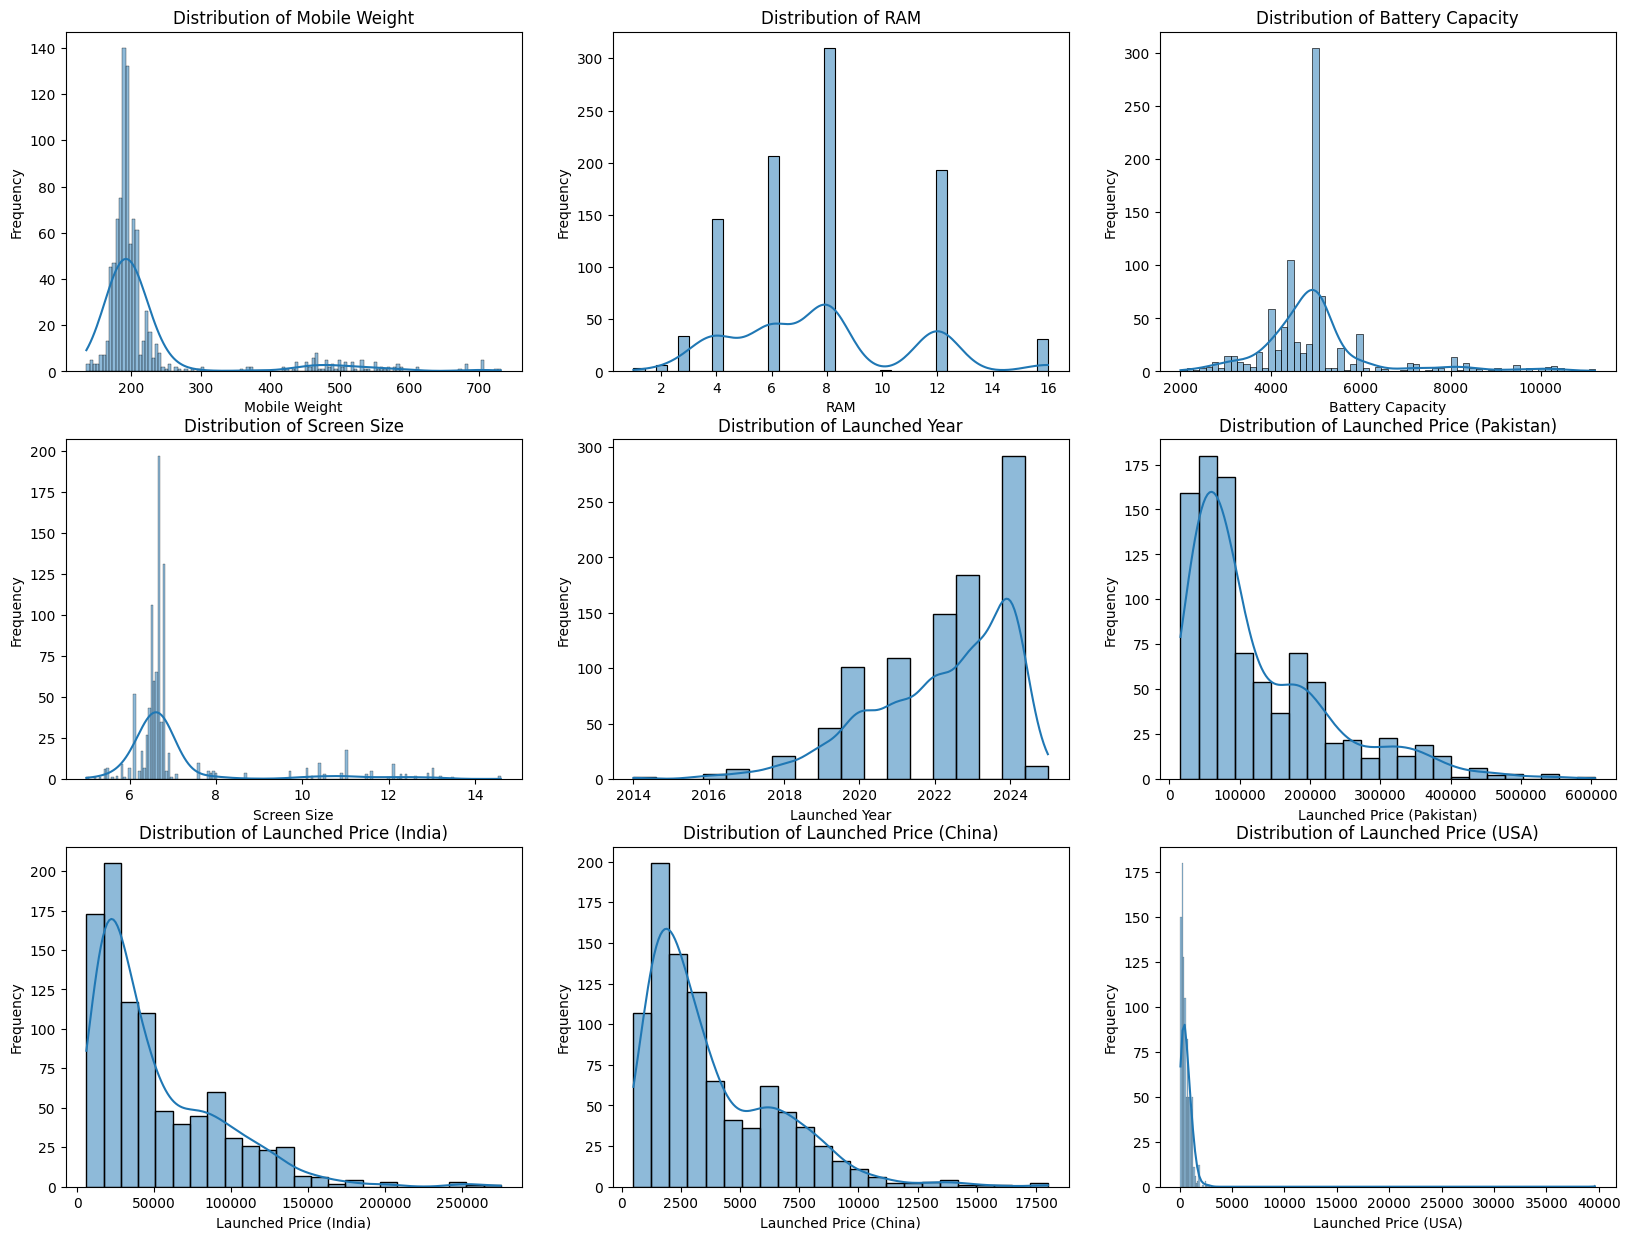

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features' histograms
numerical_features = ['Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size', 'Launched Year']
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
numerical_features.extend(price_columns)

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features[1:6]):  # Exclude price columns for better visibility
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[col], df['Launched Price (USA)'], alpha=0.5)
    plt.title(f'{col} vs. Launched Price (USA)')
    plt.xlabel(col)
    plt.ylabel('Launched Price (USA)')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features[:5]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Company Name', y=col, data=df)
    plt.title(f'Box Plot of {col} by Brand')
    plt.xlabel('Brand')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Bar charts for categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Company Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df['Processor'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Processors')
plt.xlabel('Processor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

**Reasoning**:
The previous code failed due to incorrect subplot specification.  I will correct the subplot grid to accommodate all plots and regenerate the visualizations.



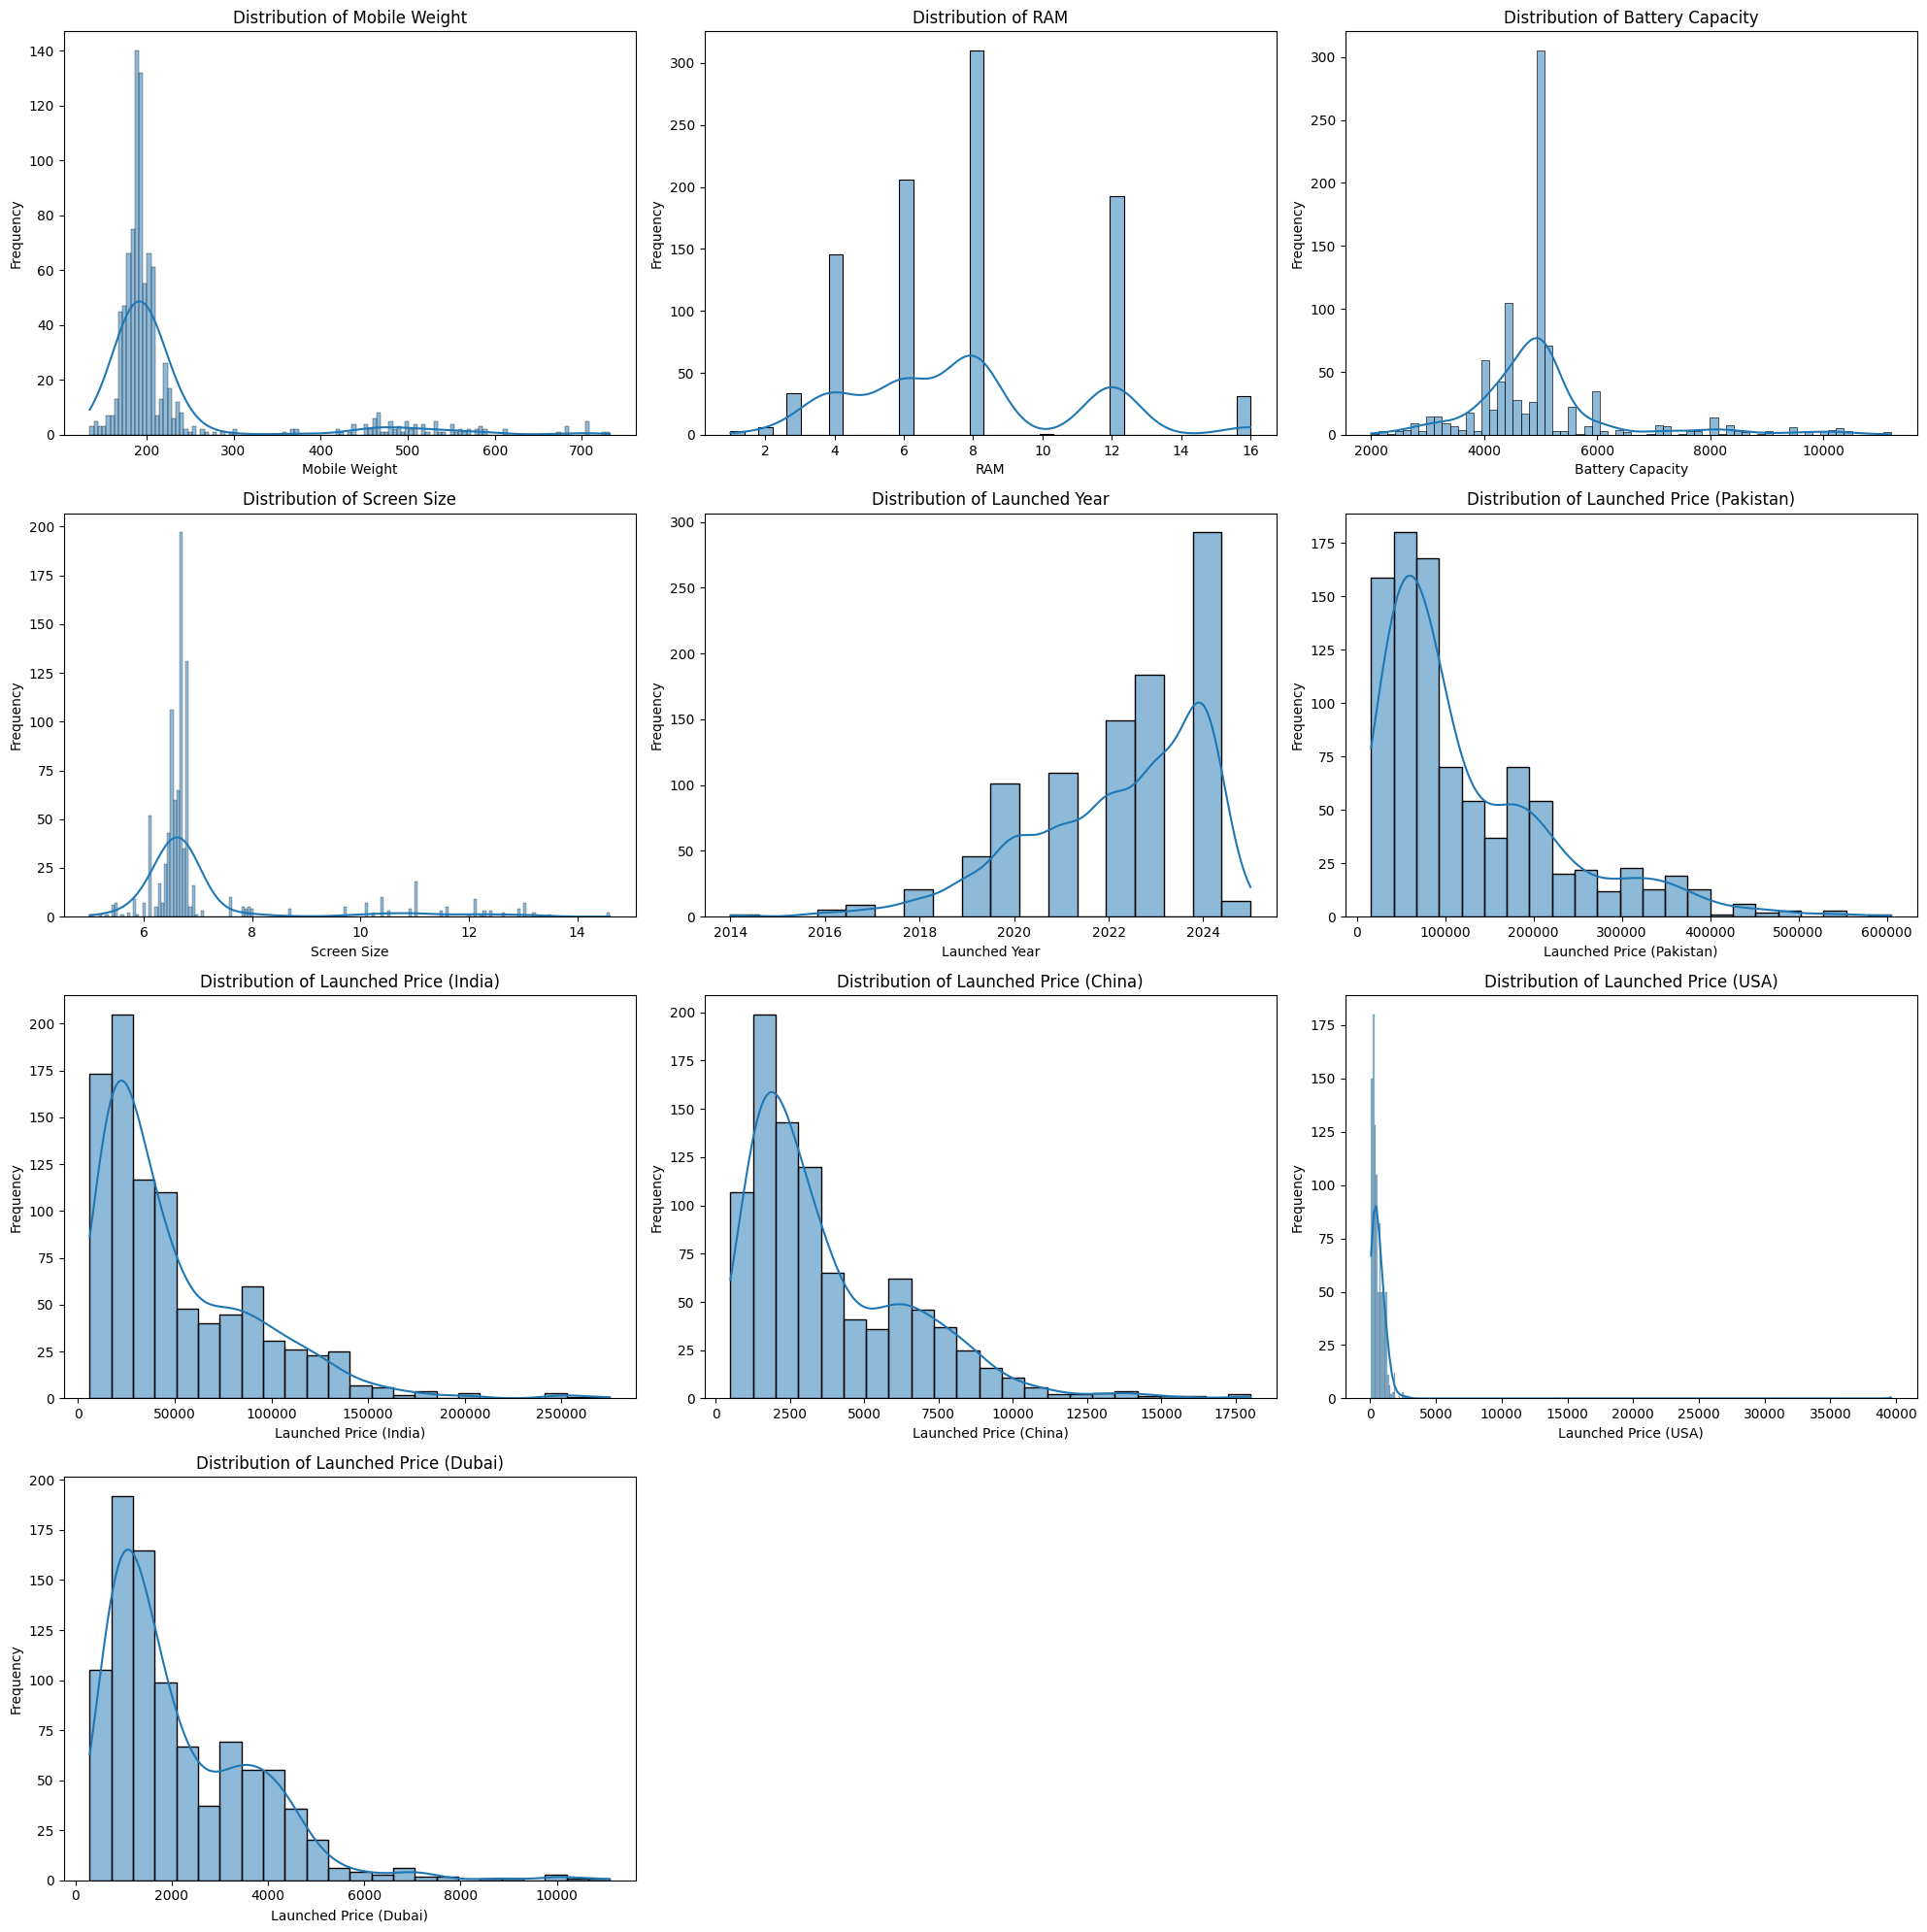

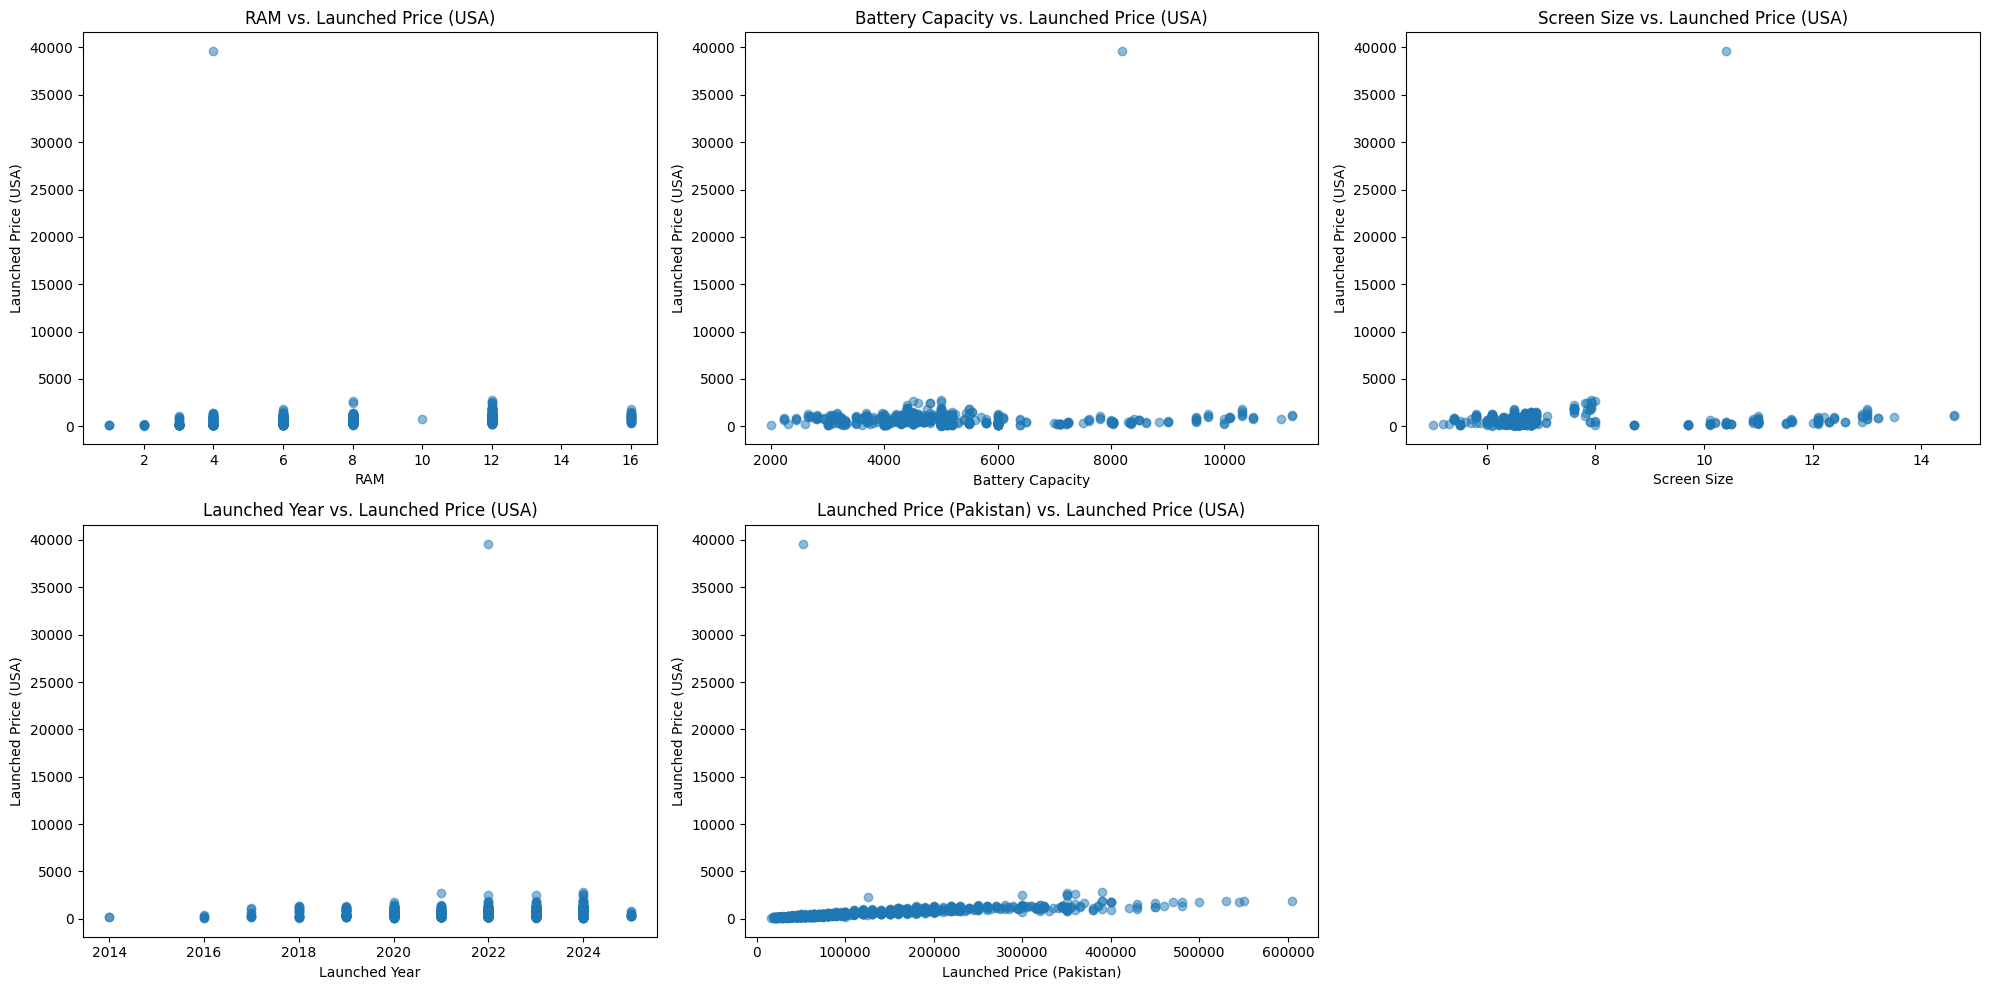

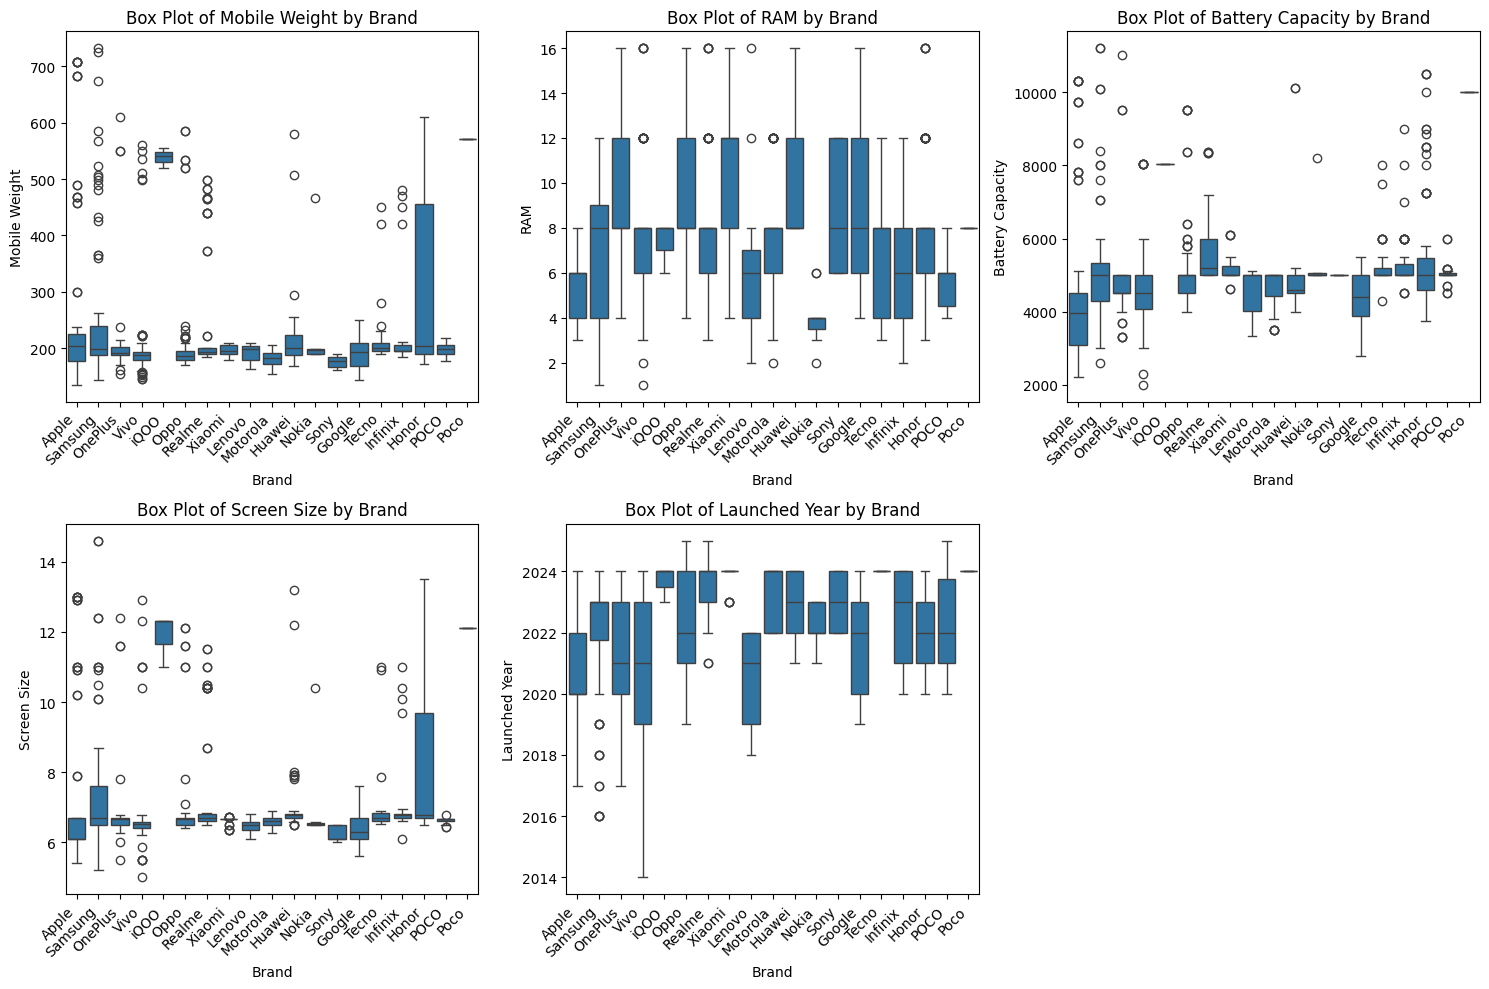

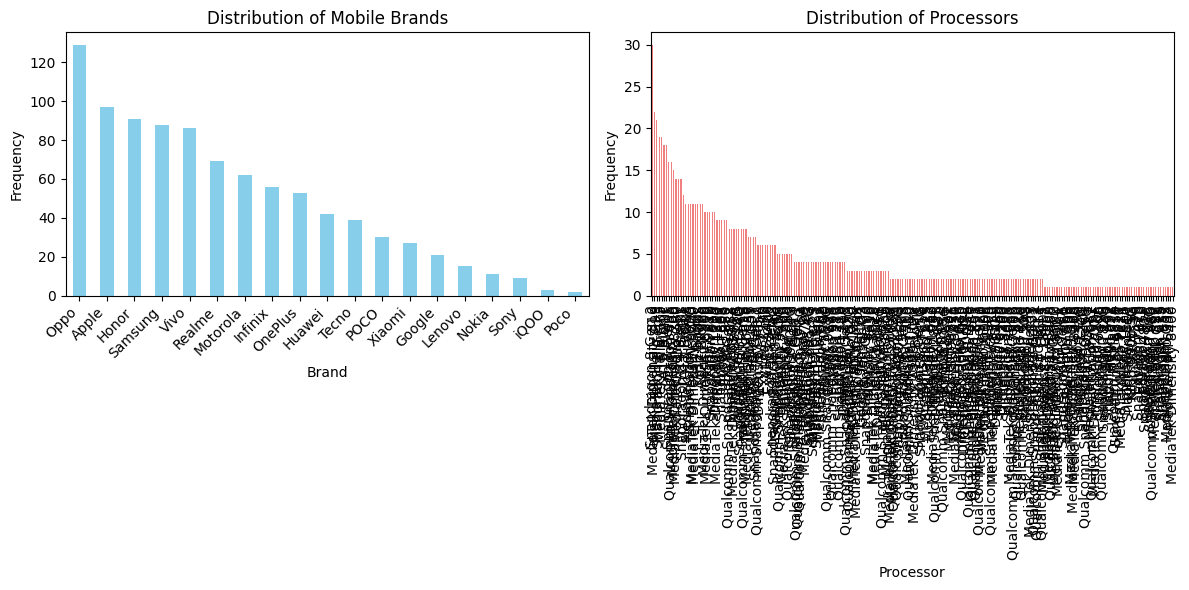

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical features' histograms
numerical_features = ['Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size', 'Launched Year']
price_columns = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']
numerical_features.extend(price_columns)

plt.figure(figsize=(20, 20))  # Increased figure size to accommodate more plots
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1) # Changed to 4x3 grid
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter plots
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features[1:6]):  # Exclude price columns
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[col], df['Launched Price (USA)'], alpha=0.5)
    plt.title(f'{col} vs. Launched Price (USA)')
    plt.xlabel(col)
    plt.ylabel('Launched Price (USA)')
plt.tight_layout()
plt.show()


# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features[:5]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Company Name', y=col, data=df)
    plt.title(f'Box Plot of {col} by Brand')
    plt.xlabel('Brand')
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar charts for categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Company Name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Mobile Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df['Processor'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Distribution of Processors')
plt.xlabel('Processor')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

* **Data Cleaning Challenges:**  Initial attempts to convert columns to numeric types faced issues due to empty strings, non-integer values (e.g., '1.5', '8 / 12' in the 'RAM' column), and inconsistencies in units (e.g., 'GB', 'g').  Robust regular expressions and NaN replacements were implemented to overcome these.
* **Numerical Feature Distributions:** Histograms revealed the distributions of numerical features like price, RAM, battery capacity, weight, and screen size.
* **Price vs. Features:** Scatter plots showed the relationships between the 'Launched Price (USA)' and other numerical features, helping visualize potential correlations.
* **Brand Comparisons:** Box plots illustrated how numerical features differ across different mobile phone brands.
* **Categorical Feature Frequencies:** Bar charts showed the distribution of mobile brands and processors, indicating the prevalence of specific brands and processor types in the dataset.


### 3. Insights or Next Steps

* **Further Correlation Analysis:**  Quantify the correlations between price and other features using correlation coefficients to confirm the visual observations from the scatter plots.
* **Feature Engineering:**  Explore creating new features from existing ones (e.g., price per GB of RAM) to potentially improve the analysis and uncover more insightful patterns.
